In [40]:
import nmi
reload(nmi)
%pylab inline
plt.viridis()

base_dim = 7.
mpl.rcParams['svg.fonttype'] = 'none' #Theoretically output text not paths
mpl.rcParams['font.size'] = 14.
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['mathtext.default'] = u'regular'
mpl.rcParams['figure.figsize'] = 1.62*base_dim, base_dim
mpl.rcParams['image.cmap'] = 'viridis'

Populating the interactive namespace from numpy and matplotlib


/home/kevin/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'f', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [99]:
directory = '0.9/'
objectiveFN = directory + '/objective.npy'
parameterFN = directory + '/params.npy'
atsFN = directory + '/ats.npy'
mtxFN = directory + '/mtx.npy'
distFN = '../structure/dmat.npy'

o,p = np.load(objectiveFN),np.load(parameterFN)
ats,mtx = np.load(atsFN),np.load(mtxFN)
seq = mtx[0]
m,l = mtx.shape
print "{} sequences x {} residues".format(m, l)

mtx = mtx[np.argsort(p[-1])]
p = np.sort(p, 1)

1108 sequences x 543 residues


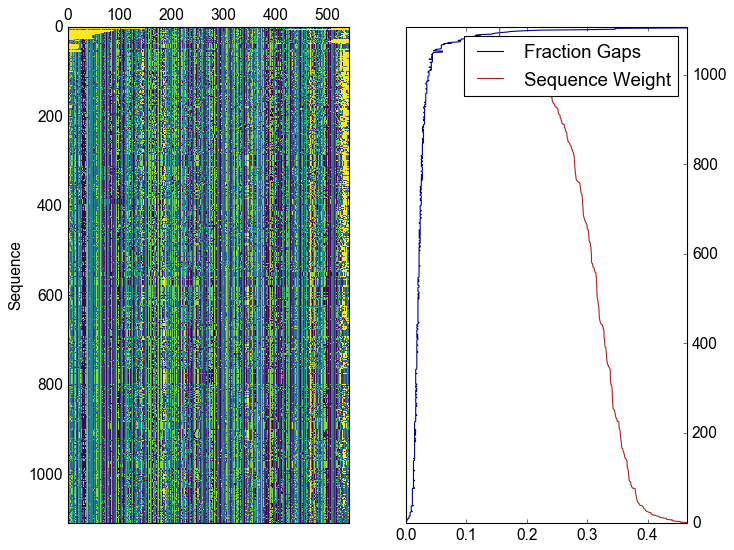

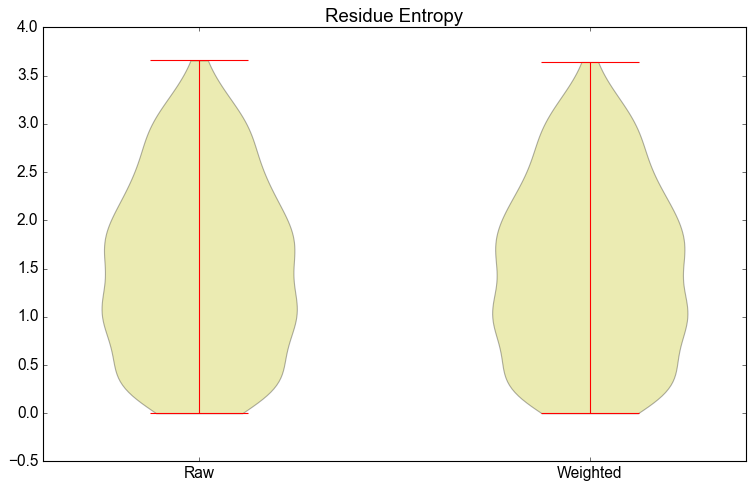

In [100]:
PS = nmi.marginal_probabilities(mtx.T)
plt.figure(figsize=(10,8))
ax = plt.subplot(121)
ax.matshow(mtx, aspect='auto')
plt.ylabel("Sequence")
ax = plt.subplot(122)
ax.plot(PS[-1], range(m)[::-1], c='darkblue')
ax.plot(p[-1]*PS[-1].max()/p[-1].max(), range(m)[::-1], c='firebrick')
ax.legend(['Fraction Gaps', 'Sequence Weight'])
ax.yaxis.tick_right()
plt.axis((0., PS[-1].max(), 0., m))


P = nmi.marginal_probabilities(mtx, weights=p[-1])

H = nmi.marginal_entropy(mtx)
HW= nmi.marginal_entropy(mtx, weights=p[-1])
plt.figure()
plt.violinplot([H, HW])
plt.xticks((1,2), ["Raw", "Weighted"])
plt.title("Residue Entropy")

#ats,mtx = ats[HW>=1.],mtx[:,HW>=1.]

m,l = mtx.shape

(21, 1108)
(2, 1108)


'\nfor i in range(21):\n    plt.figure()\n    plt.scatter(PS[i], p[-1])\n    plt.title("Residue: {}".format(nmi.aaMapping[i]))\n'

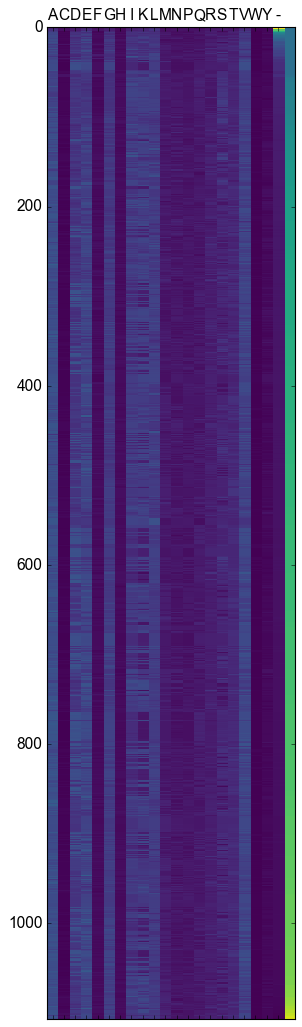

In [101]:
PS = nmi.marginal_probabilities(mtx.T)

print PS.shape
print p[-2:].shape
plt.matshow(np.hstack((PS.T/PS.max(), p[-2:].T/p[-1].max()))[:,:-1], aspect='auto')
plt.xticks(range(21), [nmi.aaMapping[i] for i in range(21)])

"""
for i in range(21):
    plt.figure()
    plt.scatter(PS[i], p[-1])
    plt.title("Residue: {}".format(nmi.aaMapping[i]))
"""

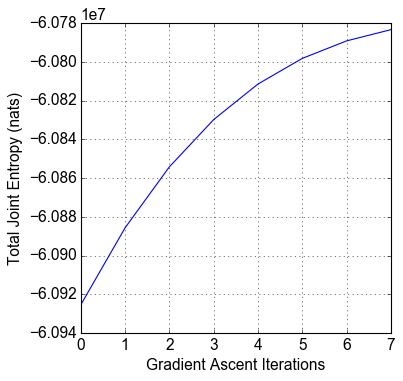

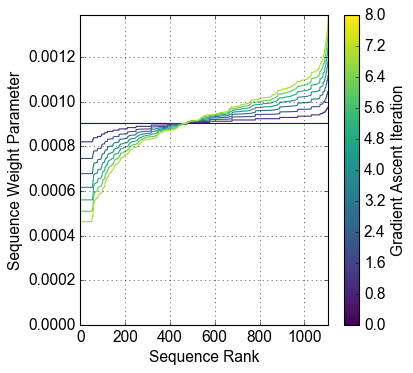

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(o)
plt.xlabel("Gradient Ascent Iterations")

plt.ylabel("Total Joint Entropy (nats)")
#plt.axis((0., len(p)-1,.99*o.min(), 1.01*o.max()))
plt.grid()

plt.figure(figsize = (5,5))
cmap = plt.get_cmap('viridis')
for i,params in enumerate(p):
    plt.plot(params, '-', c=cmap(i/float(len(o))))
plt.axis((0,m,0,p.max()))
plt.xlabel("Sequence Rank")
plt.ylabel("Sequence Weight Parameter")
norm = mpl.colors.Normalize(0., len(p))
sm = mpl.cm.ScalarMappable(norm, cmap)
sm.set_array(np.arange(len(p)))
plt.colorbar(sm, label = "Gradient Ascent Iteration")
plt.grid()

In [ ]:
J = nmi.joint_entropy(mtx, gaps=True)
JW= nmi.joint_entropy(mtx, weights=p[-1], gaps=True)

H = diag(J)
HW = diag(JW)

I = H[:,None]+H-J
IW= HW[:,None]+HW-JW

#APC-NMI
#C = (I - np.outer(np.mean(I,0), np.mean(I,0)))/J
#CW = (IW - np.outer(np.mean(IW,0), np.mean(IW,0)))/JW

#MIp
#C = (I - np.outer(np.mean(I,0), np.mean(I,0)))/J
#CW = (IW - np.outer(np.mean(IW,0), np.mean(IW,0)))/JW


#C,CW = I/(H[:,None] + H +J),IW/(HW[:,None] + HW + JW)

#Redundancy
#C,CW = I/(H[:,None] + H),IW/(HW[:,None] + HW)

#NMI
C,CW = I/J,IW/JW

#MI
#C,CW = I,IW

#zsc = lambda x: (x-np.median(x))/np.median(x)
#C = np.array(map(zsc, np.array(map(zsc, C)).T))
#CW = np.array(map(zsc, np.array(map(zsc, CW)).T))

In [ ]:
cmax = max(C.max(), CW.max())
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(0., cmax)
sm   = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
sm.set_array(C)


f = plt.figure(figsize=(16, 20))
ax = plt.subplot(311, aspect=1/20.)
plt.colorbar(sm, cax=ax, orientation='horizontal')

ax = plt.subplot(323)
plt.title('NMI')
ax.matshow(triu(C,1), cmap=cmap, norm=norm)
ax.xaxis.tick_bottom()

ax = plt.subplot(324)
plt.title('Weighted NMI')
ax.matshow(triu(CW,1), cmap=cmap, norm=norm)
ax.xaxis.tick_bottom()

ax = plt.subplot(313)
ax.violinplot([C[np.triu_indices(l, 1)], CW[np.triu_indices(l, 1)]])

In [ ]:
n = 20
t = np.sort(C[triu_indices(l, 1)])[-n]
X,Y = np.where(triu(C,1) >= t)

text = """from pymol import cmd
cmd.delete('dist*')
cmd.hide()
cmd.show('ribbon')
cmd.util.chainbow()
cmd.util.cnc()
"""

text += "cmd.delete('dist*')\n"
text += "cmd.select('unweighted', 'None')\n"
for i,j in zip(X,Y):
    text += "cmd.distance('chain C and name CA and resi {}', 'chain C and name CA and resi {}')\n".format(ats[i], ats[j])
    text += "cmd.select('unweighted', 'unweighted or (chain C and resi {}+{})')\n".format(ats[i], ats[j])



t = np.sort(CW[triu_indices(l, 1)])[-n]
XW,YW = np.where(triu(CW,1) >= t)

text += "\n\n#Weighted best scores:\n"
text += "cmd.select('weighted', 'None')\n"
for i,j in zip(XW,YW):
    text += "cmd.distance('chain B and name CA and resi {}', 'chain B and name CA and resi {}')\n".format(ats[i], ats[j])
    text += "cmd.select('weighted', 'weighted or (chain B and resi {}+{})')\n".format(ats[i], ats[j])
text += "cmd.show('sticks', 'unweighted and (sidechain or name CA)')\n"
text += "cmd.show('sticks', 'weighted and (sidechain or name CA)')\n"
.7
    
print text
with open(directory + "/pymolvis.py", "w") as out:
    out.write(text)



In [ ]:
distMat = np.load(distFN)
distMat = distMat[ats-1,:][:,ats-1]
matshow(distMat)

vdata = []

idx = np.triu(True ^ np.isnan(distMat), 1)

plt.figure(figsize=(5,5))
plt.scatter(np.triu(distMat,1)[idx], np.triu(CW,1)[idx], alpha = 0.05)
plt.scatter(np.triu(distMat,1)[XW,YW], np.triu(CW,1)[XW,YW], c='y')
plt.xlabel("Inter-residue Distance $(\AA)$")
plt.ylabel("MaxentNMI")
plt.title("Top {} Residue Pairs".format(n))
plt.axis((0.,1.05*distMat[idx].max(), 0., 1.05*CW[idx].max()))
tmp = np.triu(distMat, 1)[XW,YW]
vdata.append(tmp[True ^ np.isnan(tmp)])

plt.figure(figsize=(5,5))
plt.scatter(np.triu(distMat,1)[idx], np.triu(C,1)[idx], alpha = 0.05)
plt.scatter(np.triu(distMat,1)[X,Y], np.triu(C,1)[X,Y], c='y')
plt.xlabel("Inter-residue Distance $(\AA)$")
plt.ylabel("NMI")
plt.title("Top {} Residue Pairs".format(n))
plt.axis((0.,1.05*distMat[idx].max(), 0., 1.05*C[idx].max()))
tmp = np.triu(distMat, 1)[X,Y]
vdata.append(tmp[True ^ np.isnan(tmp)])

plt.figure(figsize=(3,5))
plt.boxplot(vdata)
plt.title("Top {} Residue Pairs".format(n))
plt.xticks([1, 2], ['MaxentNMI', 'NMI'])
plt.ylabel("Inter-residue Distance $(\AA)$")

In [ ]:
vdata

In [ ]:
figure()
plt.violinplot([diag(J), 
                diag(J)[np.union1d(X,Y)], 
                diag(JW), 
                diag(JW)[np.union1d(XW,YW)]]
               )